In [1]:
# Manipulacion de Datos

import math
import numpy as np

# Calculo Simbolico

import sympy as sp

# Visualización de Datos

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculo y Optimizacion en IA

## Fundamentos de Calculo

### ¿Qué es una variable?

Una variable es un arreglo que sirve para representar cantidades que pueden tomar distintos valores.

### ¿Qué es un algoritmo?

Una algoritmo es un conjunto de instrucciones precisas y ordenadas que se emplean para resolver problemas o realizar tareas especificas.

### ¿Qué es una ecuación?

Una ecuacion es una igualdad matematica que contiene una o mas incognitas, representadas como variables, y expresa la relacion en la que dos expresiones o valores son iguales.

### ¿Qué es una función?

Una funcion es una relacion matematica que asigna de manera univocal cada elemento de un conjunto de entrada a un elemento correspondiente en otro conjunto.

Suelen representarse como f(x) o y=f(x), donde x denota la variable de entrada e y la de salida.

### ¿Qué es la pendiente de una función?

La pendiente de una funcion es una medida que describe la inclinacion o tasa de cambio de una funcion en un punto especifico o entre dos puntos de su grafico y representa como cambia la variable de salida en relacion con un cambio en la variable de entrada.

$$p = \frac{\Delta y}{\Delta x}$$

### ¿Qué son las derivadas?

La derivada de una función $f(x)$ en un punto $x_0$ representa la tasa de cambio instantánea de la función en ese punto. Matemáticamente, se denota como $f'(x_0)$ o $\frac{df}{dx}$.

La derivada de f(x) será:  2*x + cos(x)


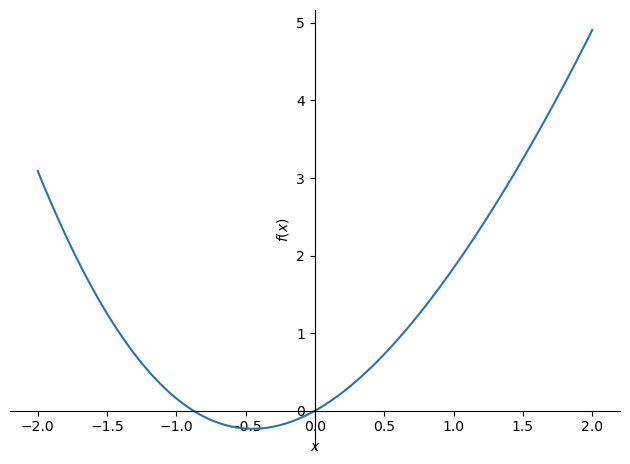

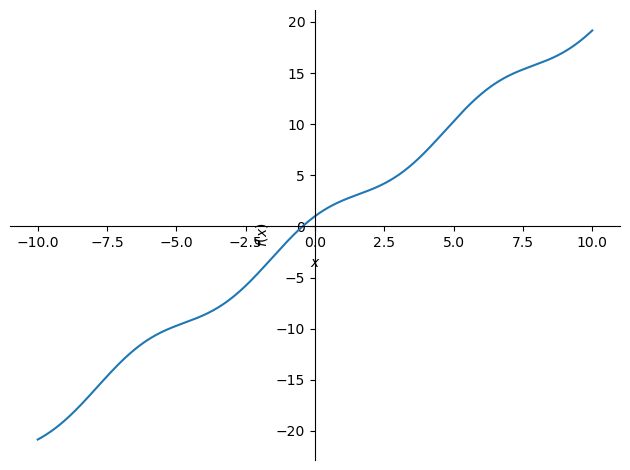

x1:  2.23168886887382
x2:  1.87758256189037
x3:  1
x3:  0.795004165278026
x3:  0.580066577841242
x3:  0.355336489125606
x3:  0.121060994002885


In [3]:
x = sp.symbols('x')

f = sp.sin(x) + x**2
f_prime = sp.diff(f, x)
print("La derivada de f(x) será: ", f_prime)

sp.plot(f, (x, -2, 2))
sp.plot(f_prime, (x, -10, 10))

x1=f_prime.subs(x, 0.75)
print("x1: ", x1)
x2=f_prime.subs(x, 0.5)
print("x2: ",x2)
x3=f_prime.subs(x, 0)
print("x3: ",x3)
x3=f_prime.subs(x, -0.1)
print("x3: ",x3)
x3=f_prime.subs(x, -0.2)
print("x3: ",x3)
x3=f_prime.subs(x, -0.3)
print("x3: ",x3)
x3=f_prime.subs(x, -0.4)
print("x3: ",x3)

### ¿Qué son las integrales?

Se denotan como $\int f(x) \, dx$ y son la operación inversa a las derivadas. El resultado de una integral indefinida es una familia de funciones, ya que se agrega una constante arbitraria de integración, denotada comúnmente como $C$, debido a que una derivada única no permite determinar completamente la función original.

$$
\int f(x) \, dx = F(x) + C,
$$

donde $F(x)$ representa la función antiderivada de $f(x)$ y $C$ es la constante de integración.

* Integrales Indefinidas

* Integrales Definidas
Si concretamos las integrales indefinidas a un intervalo concreto, tendremos un nuevo concepto: las integrales definidas que representan el área bajo la curva entre dos puntos específicos del eje x. Esto se denota como sigue:

$$
\int_{a}^{b} f(x) \, dx,
$$

donde \(a\) y \(b\) son los límites de integración.


In [5]:
f_integral = sp.integrate(f, x)
print("La integral indefinidad de f(x) será: ", f_integral)

f_integral_def = sp.integrate(f, (x, 0, 1)) # Entre 0 y 1
print("La integral definidad de f(x) entre 0 y 1 será: ", f_integral_def)

La integral indefinidad de f(x) será:  x**3/3 - cos(x)
La integral definidad de f(x) entre 0 y 1 será:  4/3 - cos(1)


### ¿Cómo se realizan integrales computacionalmente?

#### Sumas de Riemman

$$
\int_{a}^{b} f(x) \, dx \approx \sum_{i=1}^{n} f(x_i^*) \Delta x_i
$$

donde $x_i^*$ representa una muestra específica dentro del subintervalo, y $\Delta x_i$ es el ancho de cada subintervalo en la partición del intervalo \([a, b]\).

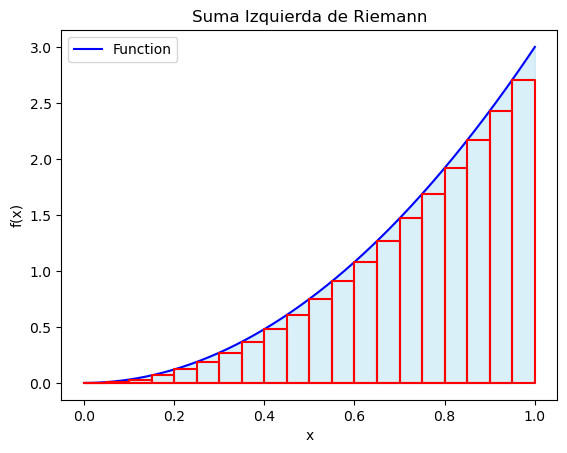

La integral aproximada será:  0.9262500000000002


In [7]:
def func(x):
    return 3*x**2

def left_riemann_sum(f, a, b, n):
    """
    Approximate the definite integral of f from a to b by the left Riemann sum,
    and plot the function and rectangles for visualization.

    f : the function to integrate.
    a, b : the lower and upper limits of integration.
    n : the number of intervals.

    Returns the approximate integral value.
    """

    h = (b - a) / n
    integral_approximation = 0

    # Lists to store rectangle points
    x_rectangles = []
    y_rectangles = []

    for i in range(n): # .
        x = a + (i * h)
        integral_approximation += f(x) * h # .

        # Store points for rectangle visualization
        x_rectangles += [x, x, x + h, x + h, x]
        y_rectangles += [0, f(x), f(x), 0, 0]

    # Plotting
    x_values = np.linspace(a, b, 300)
    y_values = [f(x) for x in x_values]

    plt.plot(x_values, y_values, label='Function', color='blue')
    plt.fill_between(x_values, y_values, color='skyblue', alpha=0.3)

    # Plot rectangles
    plt.plot(x_rectangles, y_rectangles, color='red')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Suma Izquierda de Riemann')
    plt.legend()
    plt.show()

    return integral_approximation

integral = left_riemann_sum(func, 0, 1, 20)
print("La integral aproximada será: ", integral)

**Ejercicio:**

En el campo de la ciencia de datos y el aprendizaje automático, la Curva ROC (Receiver Operating Characteristic) se utiliza para evaluar la calidad de los modelos de clasificación binaria. El Área bajo la Curva ROC (AUC-ROC) es una métrica importante que cuantifica la capacidad de un modelo para discriminar entre clases positivas y negativas.

Tomando el dataset creado por el siguiente código:

In [9]:
thresholds = np.linspace(0, 1, 100)
tpr_values = np.linspace(0.1, 1, 100)
fpr_values = np.linspace(0, 0.9, 100)

roc_dataset = np.column_stack((thresholds, tpr_values, fpr_values))

Utilizando python:
* Construya una funcion, donde se calcule el area bajo la curva, dado un dataset como el anterior.
* Calcule el area bajo la curva.

#### Regla del Trapecio

La regla del trapecio es un método numérico para aproximar la integral definida de una función. Se basa en aproximar la región bajo la curva por una serie de trapecios y sumar sus áreas. La fórmula es la siguiente:

$$
\int_{a}^{b} f(x) \, dx \approx \frac{h}{2} \sum_{i=1}^{n} [f(x_{i-1}) + f(x_i)]
$$

donde $h$ es el ancho de cada subintervalo en una partición uniforme del intervalo $[a, b]$, $x_{i-1}$ y $x_i$ son puntos consecutivos en esta partición.

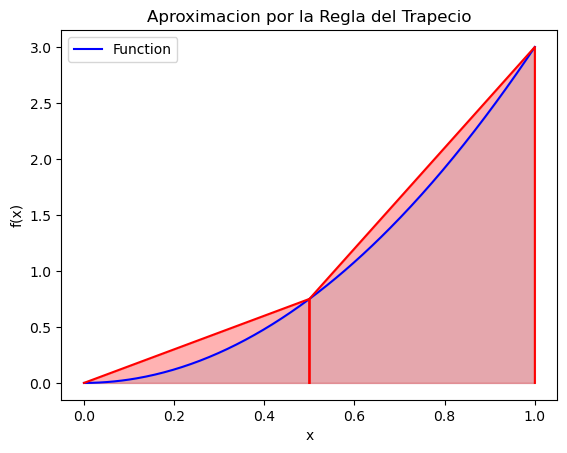

La integral aproximada será:  1.125


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_rule(f, a, b, n):
    """
    Approximate the definite integral of f from a to b by the trapezoid rule,
    and plot the function and trapezoids for visualization.

    f : the function to integrate.
    a, b : the lower and upper limits of integration.
    n : the number of trapezoids to use.

    Returns the approximate integral value.
    """

    h = (b - a) / n
    integral_approximation = 0.5 * (f(a) + f(b))

    # Lists to store trapezoid points
    x_trapezoids = [a]
    y_trapezoids = [f(a)]

    for i in range(1, n):
        x = a + i * h
        integral_approximation += f(x)
        
        # Store points for trapezoid visualization
        x_trapezoids.append(x)
        y_trapezoids.append(f(x))

    x_trapezoids.append(b)
    y_trapezoids.append(f(b))

    integral_approximation *= h

    # Plotting
    x_values = np.linspace(a, b, 300)
    y_values = f(x_values)

    plt.plot(x_values, y_values, label='Function', color='blue')
    plt.fill_between(x_values, y_values, color='skyblue', alpha=0.3)

    # Plot trapezoids
    for i in range(n):
        plt.plot([x_trapezoids[i], x_trapezoids[i], x_trapezoids[i+1], x_trapezoids[i+1]], 
                 [0, y_trapezoids[i], y_trapezoids[i+1], 0], color='red')
        plt.fill_between([x_trapezoids[i], x_trapezoids[i+1]], 
                         [y_trapezoids[i], y_trapezoids[i+1]], color='red', alpha=0.3)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Aproximacion por la Regla del Trapecio')
    plt.legend()
    plt.show()

    return integral_approximation

# Example usage
def func(x):
    return 3 * x ** 2

integral = trapezoidal_rule(func, 0, 1, 2)
print("La integral aproximada será: ", integral)

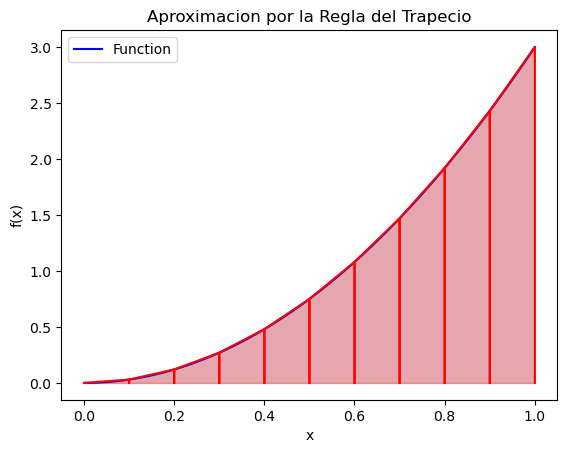

La integral aproximada será:  1.0050000000000001


In [7]:
integral = trapezoidal_rule(func, 0, 1, 10)
print("La integral aproximada será: ", integral)

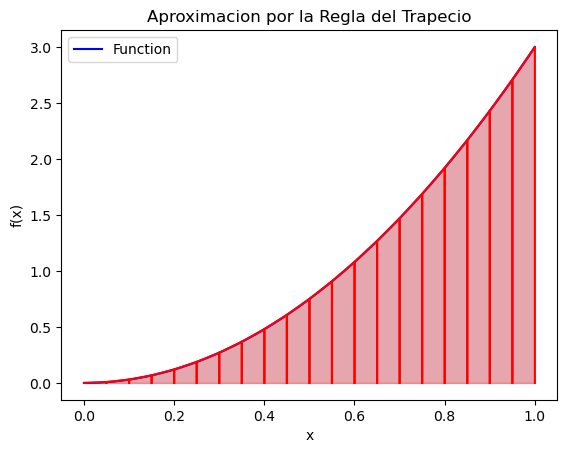

La integral aproximada será:  1.0012500000000002


In [8]:
integral = trapezoidal_rule(func, 0, 1, 20)
print("La integral aproximada será: ", integral)

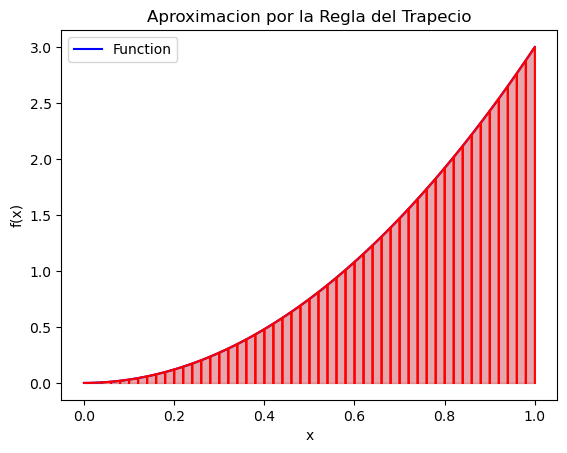

La integral aproximada será:  1.0002000000000002


In [9]:
integral = trapezoidal_rule(func, 0, 1, 50)
print("La integral aproximada será: ", integral)

**Ejercicio:**

Empleando el mismo dataset que para el caso anterior, calcule el area debajo de la curva empleando la regla del trapecio.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def auc_roc_riemann(dataset):
  sorted_dataset = dataset[dataset[:, 2].argsort()] # Sort by ascending FPR
  auc_riemann = 0
  for i in range(1, len(sorted_dataset)-1):
    delta_fpr = sorted_dataset[i, 2] - sorted_dataset[i - 1, 2]
    tpr = (1/2) * (sorted_dataset[i, 1] + sorted_dataset[i-1, 1])
    auc_riemann += tpr * delta_fpr

  return auc_riemann

area_under_roc_riemann = auc_roc_riemann(roc_dataset)

print(f"El area bajo la curva AUC-ROC usando sumas de Riemann será: {area_under_roc_riemann:.4f}")

def auc_roc_trapezoid(dataset):
  sorted_dataset = dataset[dataset[:, 2].argsort()] # Sort by ascending FPR
  auc_trap = 0
  for i in range(1, len(sorted_dataset)-1):
    delta_fpr = sorted_dataset[i, 2] - sorted_dataset[i - 1, 2]
    tpr_avg = 1/2* (sorted_dataset[i, 1] + sorted_dataset[i-1, 1])
    auc_trap += tpr_avg * delta_fpr

  return auc_trap

integral = auc_roc_trapezoid(roc_dataset)
print(f"La integral aproximada será: ", {integral.4f})

SyntaxError: invalid decimal literal (3856605940.py, line 29)

### ¿Qué tipos de error podemos encontrar en la computación numérica?

* Error Absoluto $(𝐸_𝑎)$

El Error Absoluto se define como la diferencia absoluta entre el valor real de la integral (I) y la aproximación numérica (Iₙ):
$$
E_a = |I - I_n|
$$

* Error Relativo $(𝐸_𝑟)$

El Error Relativo se obtiene dividiendo el error absoluto por el valor real de la integral, generalmente expresado en porcentaje para una mejor interpretación:
$$
E_r = \left| \frac{I - I_n}{I} \right| \times 100\%
$$


## Fundamentos de Optimización

### Aspectos Clave

Se conoce como optimizacion a la accion de encontrar los valores maximos y minimos de una funcion.
A la hora de trabajar con modelos de ML esto es muy importante, ya que en muchos casos, se busca encontrar los valores que maximicen o minimicen ciertos valores del modelo.

* Locales
* Globales

### ¿Qué debe cumplir una función para que se puedan encontrar puntos críticos?

* Continuidad.
* Diferenciabilidad de la función. 
* Derivada igual a 0.
* Prueba de la segunda derivada.
  * Si la segunda derivada en el punto crítico es positiva, el punto es un mínimo local.
  * Si es negativa, es un máximo local.
  * Si es igual a cero, la prueba no concluye y se necesita un análisis adicional.

### ¿Qué ocurre para funciones con múltiples variables?

Si consideramos la función:
$$
f(x_1, x_2, \dots, x_n)
$$

* Máximos y Mínimos Locales: Aquí hay que considerar múltiples direcciones.
* Una derivada parcial indica cómo cambia una función de varias variables con respecto a una de ellas, manteniendo las demás constantes. Se denotan como:
$$
\frac{\partial f}{\partial x_1}, \quad \frac{\partial f}{\partial x_2}, ..., \quad \frac{\partial f}{\partial x_n}
$$
* El gradiente de una función es un vector que apunta en la dirección de la máxima tasa de cambio de la función, y contiene todas las derivadas parciales de la función. Para una función $f(x_1,x_2)$, el gradiente se denota como:
$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right)
$$

Los puntos críticos en la optimización multivariada son aquellos en los que el gradiente de la función es igual a cero o donde no existe el gradiente. Matemáticamente, esto se expresa como:
$$
\nabla f(x) = 0
$$

## Descenso del Gradiente

### ¿Qué es una función objetivo?

Se define como la funcion matematica que se emplea para expresar el objetivo principal de un problema de optimizacion y representan cosas como:
* las ganancias de, por ejemplo, nuestro robo advisor (el objetivo será maximizar esa funcion)
* los costos de nuestra empresa (el objetivo será minizarlo sin afectar a las ganancias)
* la distancia de un viaje

### ¿Qué son las restricciones en un problema de optimización?

Se define como las condiciones adicionales que limitan las soluciones viables de un problema de optimizacion, por ejemplo,
* de recursos
* de tiempo
* de capacidad

### ¿Qué es y para qué sirve el algoritmo de Descenso del Gradiente?

Es un algoritmo que se inicializa desde un punto inicial y utiliza información local, en forma del vector gradiente, para tomar pasos o iteraciones sucesivas en las que el algoritmo ajusta gradualmente la posición en la que se encuentra hasta converger en un mínimo local o global de la función objetivo.

### Analicemos los pasos que indica el algoritmo de Descenso del Gradiente

1. Inicialización:
Comienza con un valor inicial para el vector de parámetros $ x_k $.

2. Cálculo del Gradiente:
Calcula el gradiente de la función objetivo en el punto actual $ x_k $:
$$
\nabla f(x_k)
$$

3. Actualización de Parámetros:
Actualiza el parámetro para la siguiente iteración usando la fórmula:
$$
x_{k+1} = x_k - \alpha \cdot \nabla f(x_k)
$$
donde $\alpha$ es la tasa de aprendizaje.

4. Convergencia:
Verifica si se cumple algún criterio de parada. Los criterios de parada típicos pueden incluir:
- Un número máximo de iteraciones alcanzado.
- Una pequeña diferencia entre los valores de la función objetivo en dos iteraciones sucesivas (indicando convergencia).

Si se cumple el criterio de parada, el algoritmo se detiene. De lo contrario, regresa al paso de cálculo del gradiente para el nuevo punto $ x_{k+1} $ y repite el proceso.

2*x
[2, 1.6, 1.28, 1.024, 0.8192, 0.65536, 0.5242880000000001, 0.4194304000000001, 0.33554432000000006, 0.26843545600000007, 0.21474836480000006, 0.17179869184000005, 0.13743895347200002, 0.10995116277760002, 0.08796093022208001, 0.070368744177664, 0.056294995342131206, 0.04503599627370496, 0.03602879701896397, 0.028823037615171177, 0.02305843009213694, 0.018446744073709553, 0.014757395258967642, 0.011805916207174114, 0.009444732965739291, 0.0075557863725914335, 0.006044629098073147, 0.004835703278458518, 0.003868562622766814, 0.0030948500982134514, 0.002475880078570761]


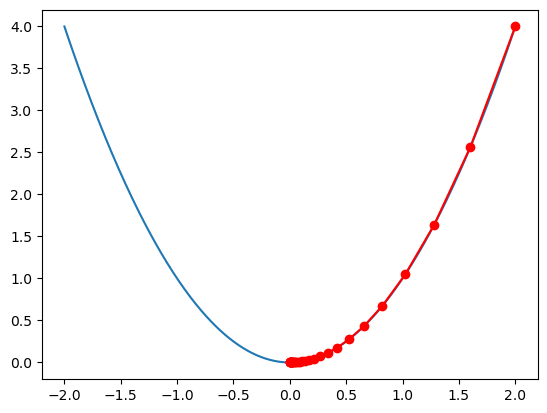

In [10]:
# Se define una funcion que implementa el algoritmo de Descenso del Gradiente

def gradient_descent(df, initial_x, learning_rate, iterations):
    x = initial_x
    
    trajectory = [x]
    
    for i in range(iterations):
        x = x - learning_rate * df(x)
        trajectory.append(x)
    
    return x, trajectory

# Se definen los simbolos que usaremos en las funciones

x = sp.symbols('x')

# Se definen las funciones

f = x**2
f_prime = sp.diff(f, x)
print(f_prime)

def df(x): return 2*x

# Se definen los parametros para el descenso del gradiente

learning_rate = 0.1 # Tasa de aprendizaje
x_initial = 2 # Punto inicial
num_iterations = 30

min_x, trajectory = gradient_descent(df, x_initial, learning_rate, num_iterations)

print(trajectory)

# Representemos que ocurre con el Metodo

x = np.linspace(-2, 2, 400)

f = x**2

plt.plot(x, f, label="f(x) = x^2")
plt.plot(trajectory, [i**2 for i in trajectory], 'ro-')
plt.show()
    
# Observamos como el minimo debería estar cerca de 0, que es el mínimo de f(x) = x^2

**Ejercicio:**

Usando python implemente el algoritmo de Descenso del Gradiente desde cero y luego encuentre encontrar un mínimo local entorno a 0 de la siguiente funcion: $f(x) = x^3 - 2x^2 + 4x + 6$, cuya derivada es, $f'(x) = 3x^2 - 4x + 4$

2*x**2 - 16*x
[10, 9.8, 9.604000000000001, 9.41192, 9.2236816, 9.039207968000001, 8.858423808640001, 8.6812553324672, 8.507630225817856, 8.337477621301499, 8.17072806887547, 8.00731350749796, 7.847167237348001, 7.690223892601041, 7.5364194147490196, 7.385691026454039, 7.237977205924959, 7.0932176618064595, 6.95135330857033, 6.812326242398924, 6.676079717550945, 6.542558123199926, 6.411706960735928, 6.283472821521209, 6.157803365090785, 6.034647297788969, 5.91395435183319, 5.795675264796526, 5.679761759500596, 5.566166524310584, 5.454843193824373]


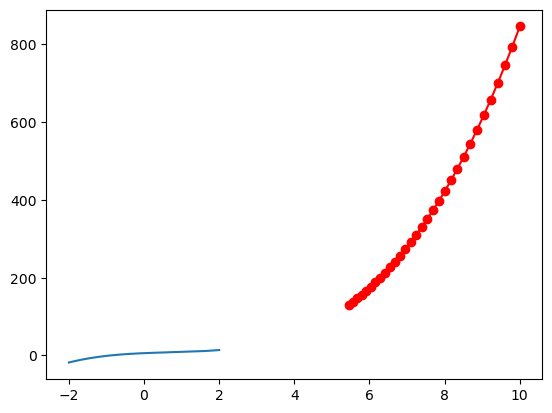

In [45]:
# Se define una funcion que implementa el algoritmo de Descenso del Gradiente

def gradient_descent(df, initial_x, learning_rate, iterations):
    x = initial_x
    
    trajectory = [x]
    
    for i in range(iterations):
        x = x - learning_rate * df(x)
        trajectory.append(x)
    
    return x, trajectory

# Se definen los simbolos que usaremos en las funciones

x = sp.symbols('x')

# Se definen las funciones

f = x**3-2*x**2+4*x+6
f_prime = 2*x**2-4*x*+4
print(f_prime)

# Se definen los parametros para el descenso del gradiente

learning_rate = 0.01 # Tasa de aprendizaje
x_initial = 10 # Punto inicial
num_iterations = 30

min_x, trajectory = gradient_descent(df, x_initial, learning_rate, num_iterations)

print(trajectory)

# Representemos que ocurre con el Metodo

x = np.linspace(-2, 2, 400)

f = x**3-2*x**2+4*x+6

plt.plot(x, f, label="f(x) = x^3")
plt.plot(trajectory, [i**3 - 2*i**2+4*i+6 for i in trajectory], 'ro-')
plt.show()
    
# Observamos como el minimo debería estar cerca de 0, que es el mínimo de f(x) = x^2

**Ejercicio:**

Trabajas en una empresa de videojuegos y tu objetivo es optimizar los ingresos generados por las compras dentro del juego. Para ello, has decidido ajustar el precio de un artículo virtual popular en el juego para maximizar los ingresos. Supongamos que la relación entre el precio del artículo $p$ y los ingresos $R$ se puede modelar con la siguiente función:

$ R(p) = -2p^2 + 60p - 200 $

donde:
- $ p $ es el precio del artículo.
- $ R(p) $ son los ingresos generados a ese precio.


Utiliza el algoritmo de descenso del gradiente para encontrar el precio óptimo que maximiza los ingresos.

**¿Qué vamos a hacer?**

1. Implementación de la función de ingresos y su derivada

2. Implementación el algoritmo de descenso del gradiente para encontrar el precio óptimo.

3. Visualización de la función de ingresos y muestra cómo cambia el precio del artículo en cada iteración del algoritmo de descenso del gradiente.

### ¿Cómo funcionaría el método de Descenso del Gradiente para el caso multidimensional?

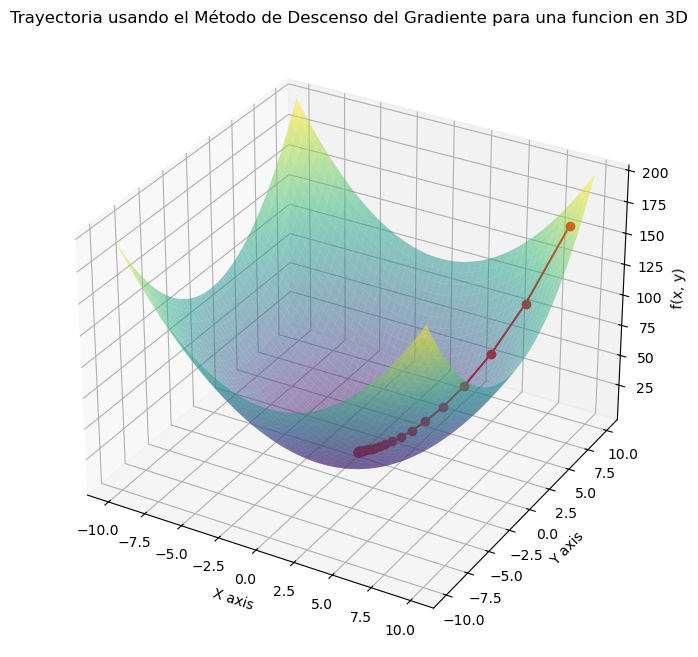

In [11]:
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2*x, 2*y

def gradient_descent(learning_rate=0.1, num_steps=10, start_point=(0.5, 0.5)):
    x, y = start_point
    trajectory = []

    for _ in range(num_steps):
        trajectory.append((x, y, f(x, y)))
        dx, dy = grad_f(x, y)
        x, y = x - learning_rate * dx, y - learning_rate * dy

    return np.array(trajectory)

trajectory = gradient_descent(learning_rate=0.1, num_steps=30, start_point=(9, 9))

x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')

ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2], color='r', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('f(x, y)')

plt.title("Trayectoria usando el Método de Descenso del Gradiente para una funcion en 3D")
plt.show()